In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils.sulfur.constant as const

from utils.TimeCorrelationCalculator import TimeCorrelationCalculator
from utils.TimeCorrelationViewer import TimeCorrelationViewer

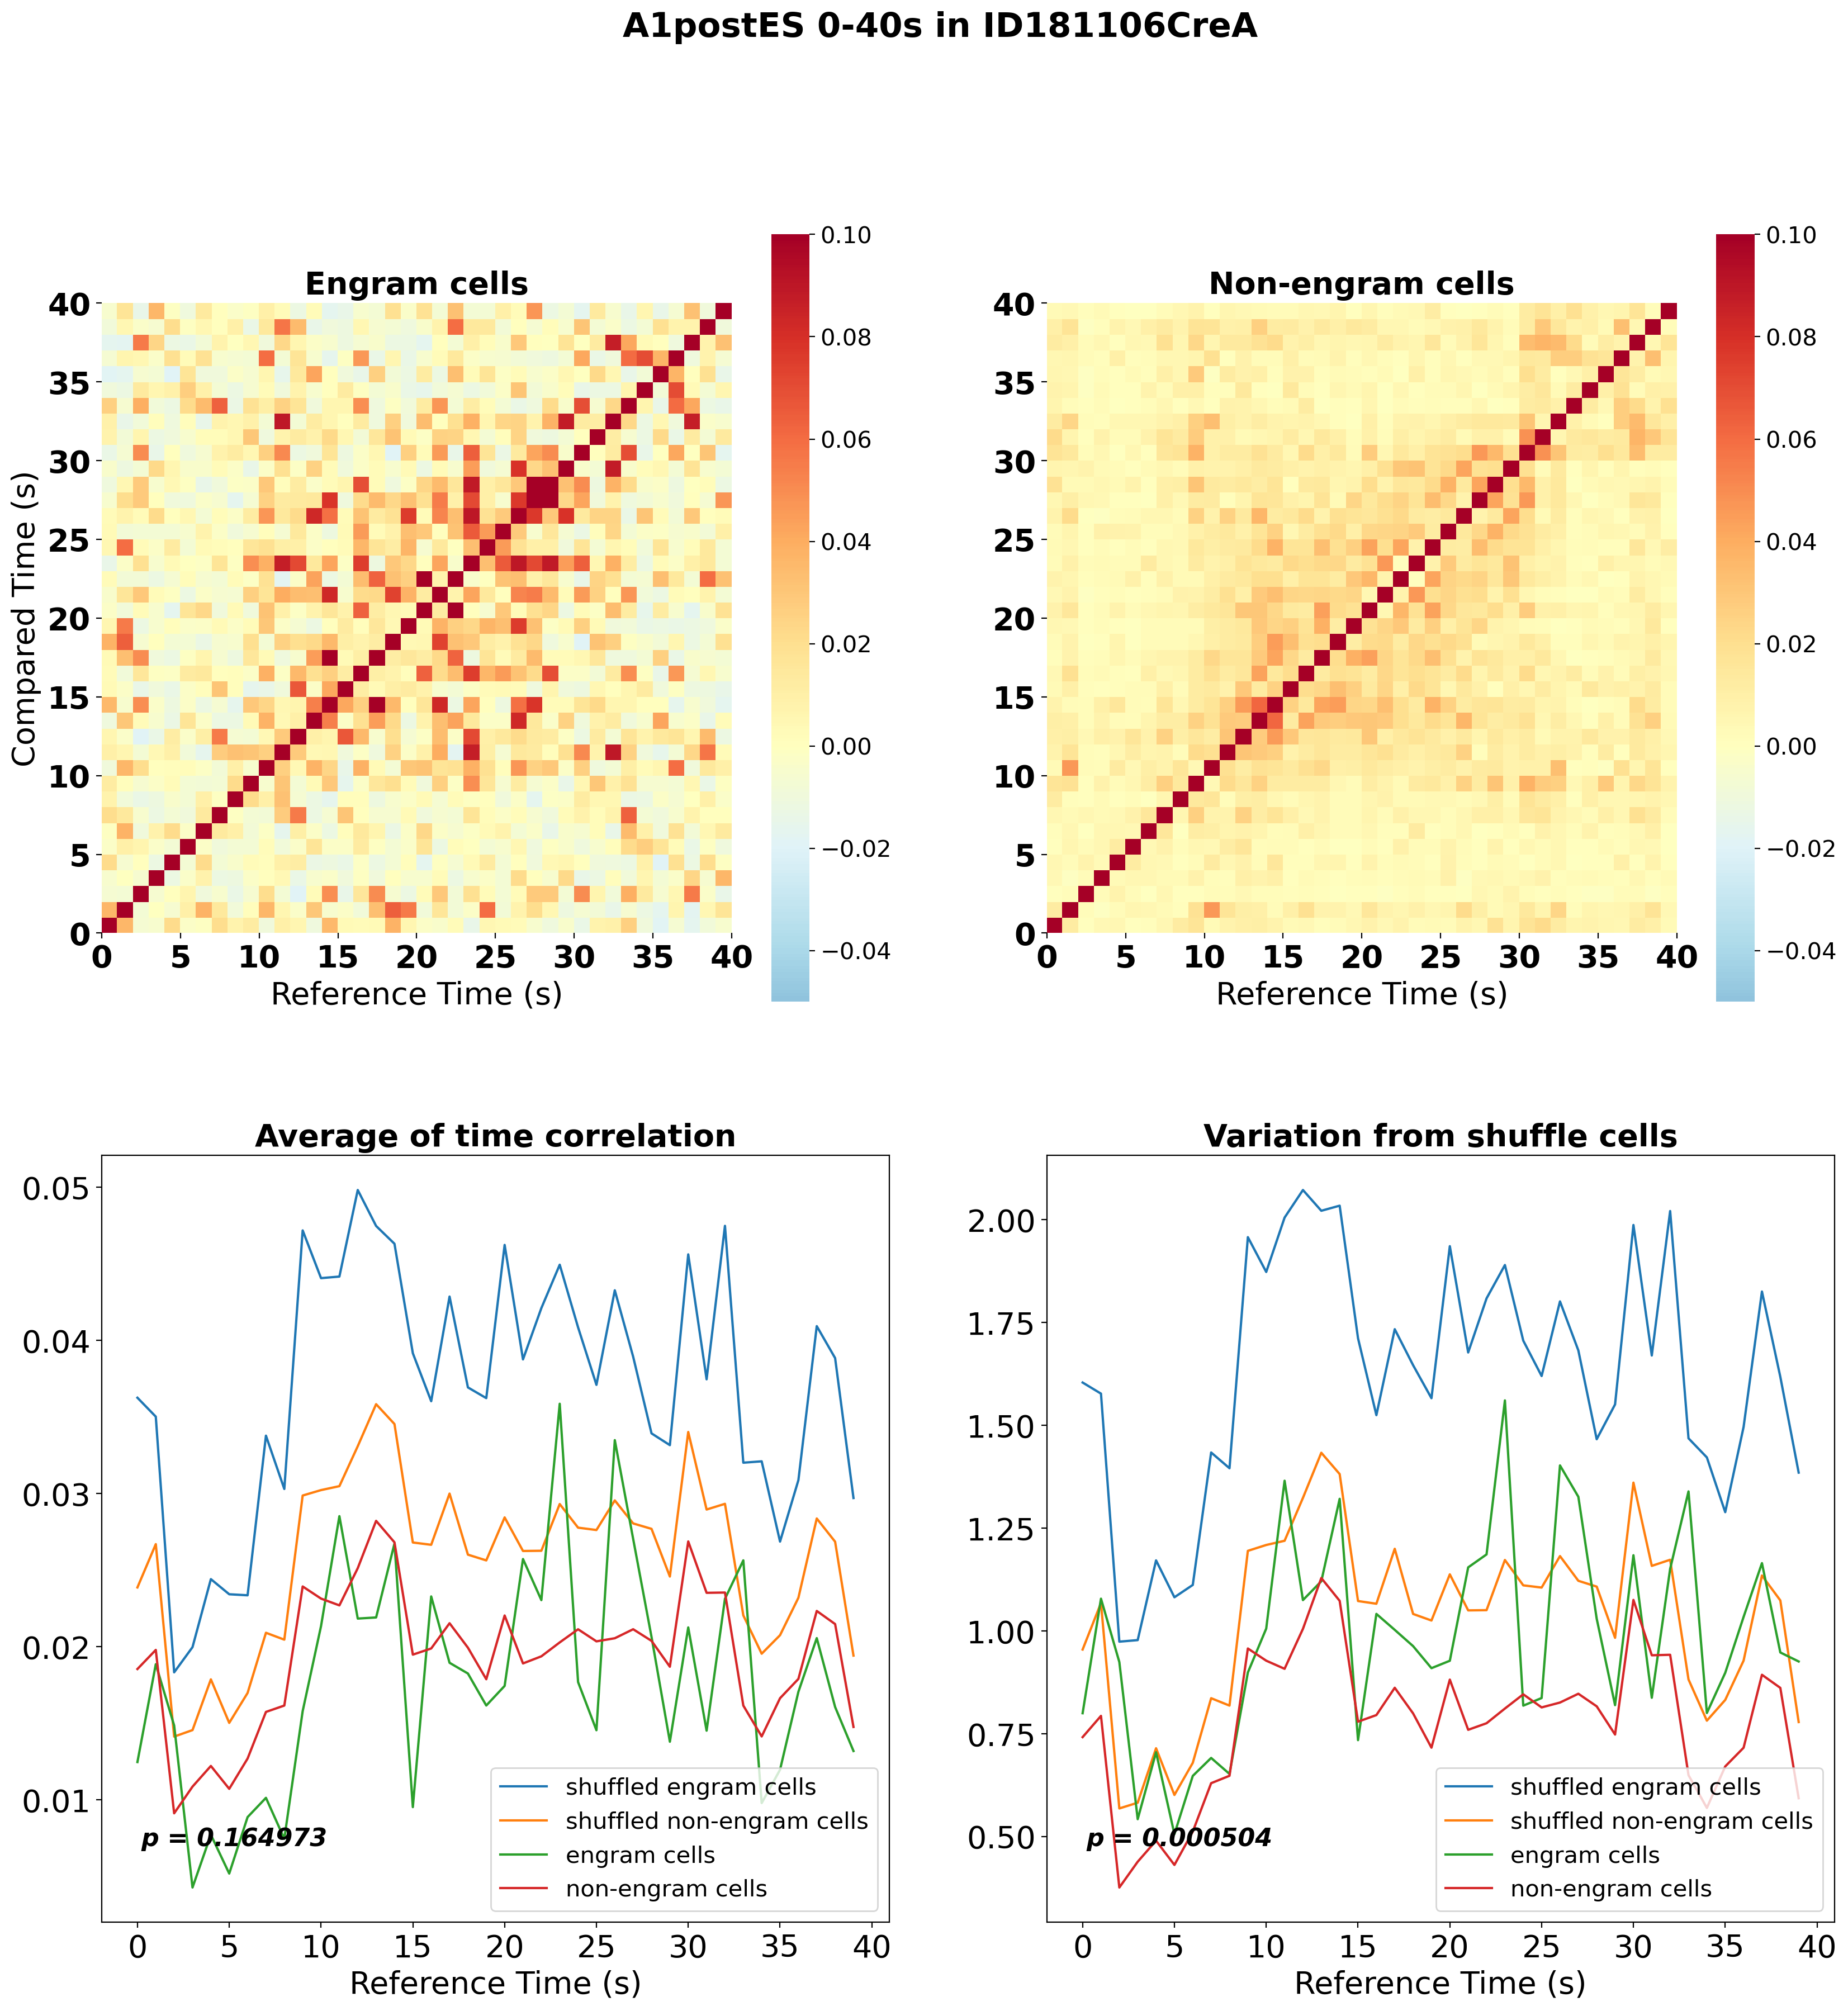

In [2]:
animal_name = const.ANIMAL_NAMES[0]
context_name = 'A1postES'

calculator = TimeCorrelationCalculator(animal_name, context_name)
result = calculator.calc(start=90, end=130)
TimeCorrelationViewer(*result).draw(title='A1postES 0-40s in %s' % animal_name)

In [10]:
def calc_means_of_sum_correlation(animal_name, context_name, start, end, quantile_value=0.95):
    print('####### %s' % context_name)
    calculator = TimeCorrelationCalculator(animal_name, context_name)
    
    shuffle_calculator, engram_df, non_engram_df = calculator.calc(start=start, end=end)
    _, engram_shuffle_abs_sum     = shuffle_calculator.quantile_for_engram(quantile_value)
    _, non_engram_shuffle_abs_sum = shuffle_calculator.quantile_for_non_engram(quantile_value)
    
    return [
        engram_shuffle_abs_sum.mean(),
        non_engram_shuffle_abs_sum.mean(),
        engram_df.abs().sum().mean(),
        non_engram_df.abs().sum().mean()
    ]

def create_ratio_data_frame():
    df_columns = ['A1preES_260-300', 'A1postES_0-40', 'A1postES_90-130', 'A1postES_180-220', 'A4preES_260-300', 'A4postES_0-40', 'A4postES_90-130', 'A4postES_180-220']
    return pd.DataFrame(columns=df_columns, index=const.ANIMAL_NAMES)

def append_ratios_to_df(animal_name, context_name, result, dfs):
    for index, df in enumerate(dfs):
        df.loc[animal_name, context_name] = result[index]
        
def view_ratio_of_sum_correlation(shuffle_engram_df, shuffle_non_engram_df, engram_df, non_engram_df):
    df_columns = shuffle_engram_df.columns
    
    engram_mean, engram_sem = engram_df.mean(), engram_df.sem()
    non_engram_mean, non_engram_sem = non_engram_df.mean(), non_engram_df.sem()
    shuffle_engram_mean, shuffle_engram_sem = shuffle_engram_df.mean(), shuffle_engram_df.sem()
    shuffle_non_engram_mean, shuffle_non_engram_sem = shuffle_non_engram_df.mean(), shuffle_non_engram_df.sem()
    
    fig, ax = plt.subplots(1, figsize=(8, 8), tight_layout=True, dpi=200)
    
    engram_color = 'royalblue'
    non_engram_color = 'tomato'
    
    shuffle_alpha = 0.5
    
    yticks = list(np.arange(0.0, 2.0, 0.10))
    ax.errorbar(df_columns, engram_mean, yerr=engram_sem, capsize=4, color=engram_color)
    ax.plot(df_columns, engram_mean, marker='s', markersize=15, label='engram cells', color=engram_color)
    
    ax.errorbar(df_columns, shuffle_engram_mean, yerr=shuffle_engram_sem, capsize=4, color=engram_color, alpha=shuffle_alpha)
    ax.plot(df_columns, shuffle_engram_mean, marker='D', markersize=15, label='shuffle engram cells', color=engram_color, alpha=shuffle_alpha)
    
    ax.errorbar(df_columns, non_engram_mean, yerr=non_engram_sem, capsize=4, color=non_engram_color)
    ax.plot(df_columns, non_engram_mean, marker='o', markersize=15, label='non-engram cells', color=non_engram_color)
    
    ax.errorbar(df_columns, shuffle_non_engram_mean, yerr=shuffle_non_engram_sem, capsize=4, color=non_engram_color, alpha=shuffle_alpha)
    ax.plot(df_columns, shuffle_non_engram_mean, marker='D', markersize=15, label='shuffle non-engram cells', color=non_engram_color, alpha=shuffle_alpha)
    
    ax.set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')
    ax.set_ylabel('Sum of correlations', fontsize=16)
    ax.legend(fontsize=14)
    fig.show()

In [4]:
shuffle_engram_df     = create_ratio_data_frame()
shuffle_non_engram_df = create_ratio_data_frame()
engram_df             = create_ratio_data_frame()
non_engram_df         = create_ratio_data_frame()

dfs = [
    shuffle_engram_df,
    shuffle_non_engram_df,
    engram_df,
    non_engram_df
]

for animal_name in const.ANIMAL_NAMES:
    print('animal name: %s' % animal_name)
    
    result = calc_means_of_sum_correlation(animal_name, 'A1preES', 260, 300)
    append_ratios_to_df(animal_name, 'A1preES_260-300', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A1postES', 0, 40)
    append_ratios_to_df(animal_name, 'A1postES_0-40', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A1postES', 90, 130)
    append_ratios_to_df(animal_name, 'A1postES_90-130', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A1postES', 180, 220)
    append_ratios_to_df(animal_name, 'A1postES_180-220', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A4preES', 260, 300)
    append_ratios_to_df(animal_name, 'A4preES_260-300', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A4postES', 0, 40)
    append_ratios_to_df(animal_name, 'A4postES_0-40', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A4postES', 90, 130)
    append_ratios_to_df(animal_name, 'A4postES_90-130', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A4postES', 180, 220)
    append_ratios_to_df(animal_name, 'A4postES_180-220', result, dfs)

animal name: ID181106CreA
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreB
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreC
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreG
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreH
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreI
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreK
####### A1preE

<ipython-input-10-ef12935b7166>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')


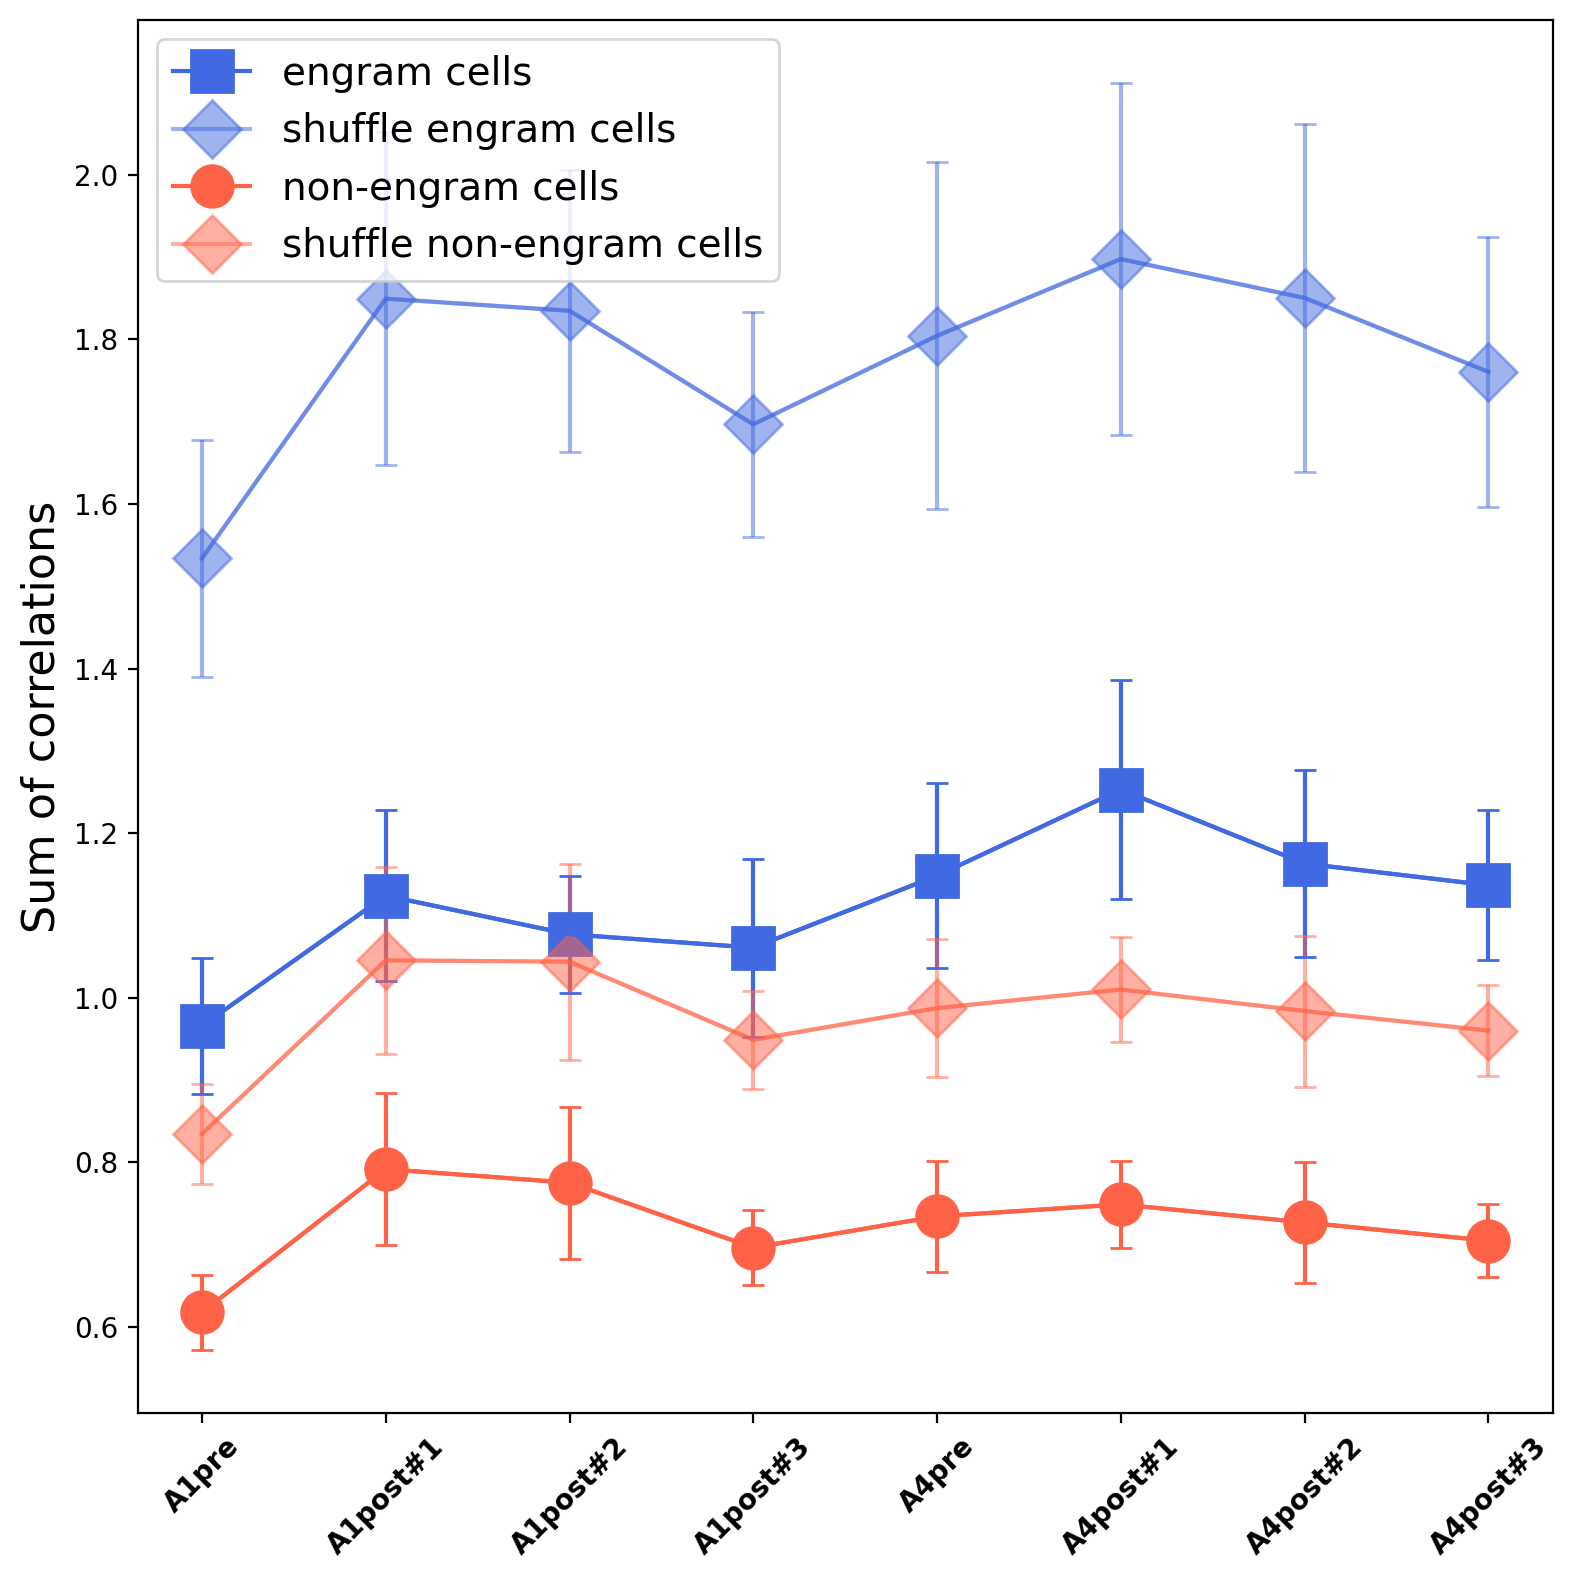

In [11]:
view_ratio_of_sum_correlation(shuffle_engram_df, shuffle_non_engram_df, engram_df, non_engram_df)

In [12]:
shuffle_engram_df     = create_ratio_data_frame()
shuffle_non_engram_df = create_ratio_data_frame()
engram_df             = create_ratio_data_frame()
non_engram_df         = create_ratio_data_frame()

dfs = [
    shuffle_engram_df,
    shuffle_non_engram_df,
    engram_df,
    non_engram_df
]

for animal_name in const.ANIMAL_NAMES:
    print('animal name: %s' % animal_name)
    
    result = calc_means_of_sum_correlation(animal_name, 'A1preES', 260, 300, quantile_value=0.5)
    append_ratios_to_df(animal_name, 'A1preES_260-300', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A1postES', 0, 40, quantile_value=0.5)
    append_ratios_to_df(animal_name, 'A1postES_0-40', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A1postES', 90, 130, quantile_value=0.5)
    append_ratios_to_df(animal_name, 'A1postES_90-130', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A1postES', 180, 220, quantile_value=0.5)
    append_ratios_to_df(animal_name, 'A1postES_180-220', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A4preES', 260, 300, quantile_value=0.5)
    append_ratios_to_df(animal_name, 'A4preES_260-300', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A4postES', 0, 40, quantile_value=0.5)
    append_ratios_to_df(animal_name, 'A4postES_0-40', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A4postES', 90, 130, quantile_value=0.5)
    append_ratios_to_df(animal_name, 'A4postES_90-130', result, dfs)
    
    result = calc_means_of_sum_correlation(animal_name, 'A4postES', 180, 220, quantile_value=0.5)
    append_ratios_to_df(animal_name, 'A4postES_180-220', result, dfs)

animal name: ID181106CreA
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreB
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreC
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreG
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreH
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreI
####### A1preES
####### A1postES
####### A1postES
####### A1postES
####### A4preES
####### A4postES
####### A4postES
####### A4postES
animal name: ID181106CreK
####### A1preE

<ipython-input-10-ef12935b7166>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')


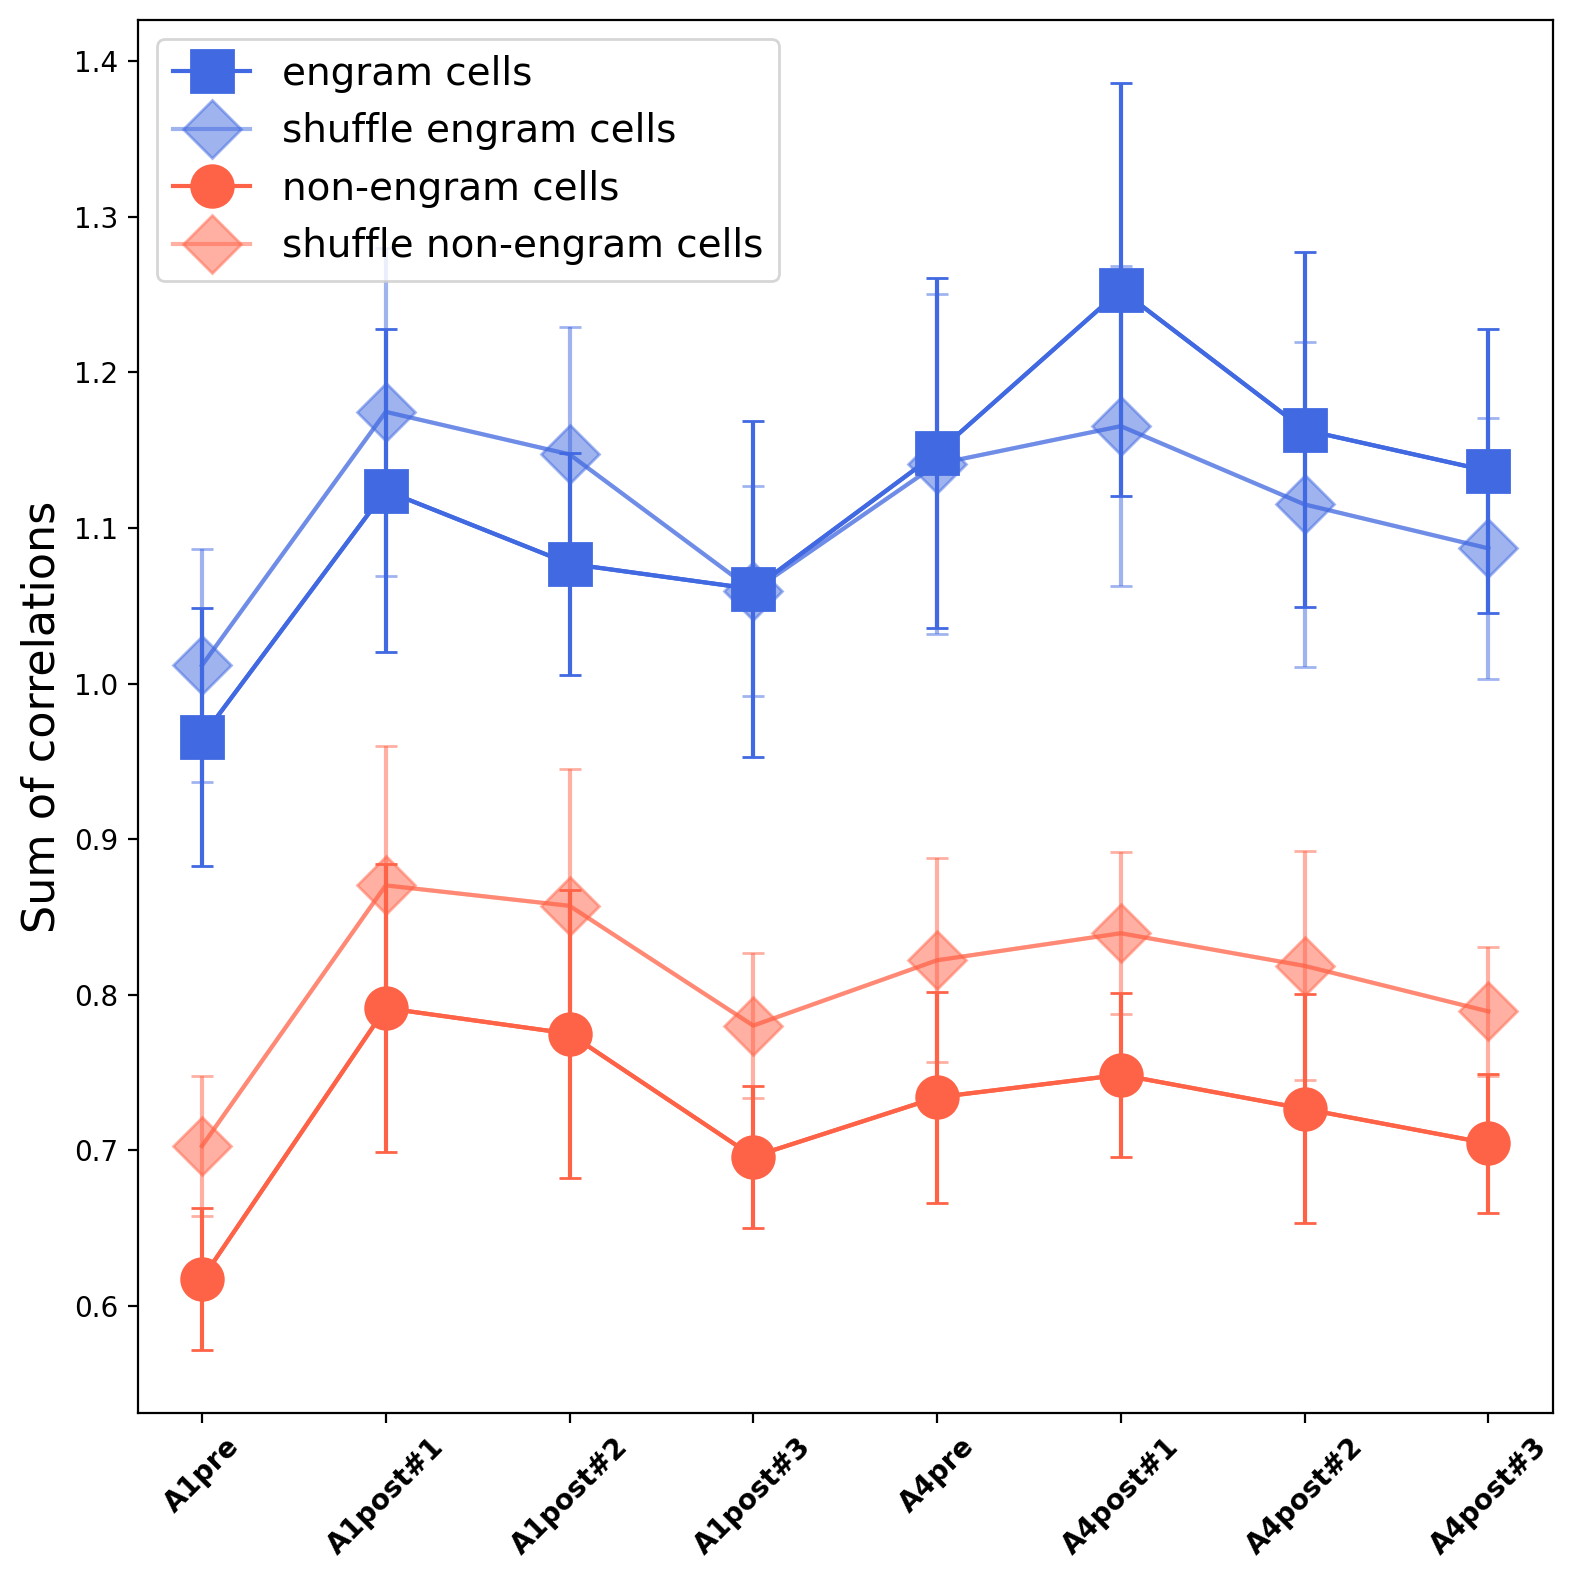

In [13]:
view_ratio_of_sum_correlation(shuffle_engram_df, shuffle_non_engram_df, engram_df, non_engram_df)